In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Cargar datos
data_path = '/Users/luissalamanca/Desktop/Duoc/Machine/ML_Proyecto_Semestral/data/03_features/engineered_data.csv'
data = pd.read_csv(data_path, sep=';')

# Separar columnas concatenadas
if len(data.columns) == 1:
    column_name = data.columns[0]
    if ',' in column_name:
        new_columns = column_name.split(',')
        data_split = data[column_name].str.split(',', expand=True)
        data_split.columns = new_columns
        for col in data_split.columns:
            data_split[col] = pd.to_numeric(data_split[col], errors='coerce')
        data = data_split

# Lista de features y target
features = [
    'EconomicEfficiency',
    'EffectivenessScore',
    'EquipmentAdvantage',
    'KillAssistRatio',
    'StealthKillsRatio'
]
X = data[features]
y = data['KDA']

# Dividir en entrenamiento/prueba (30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [5]:
pipeline_multiple = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Ajustar en training set
pipeline_multiple.fit(X_train, y_train)

# Predecir en test set (el pipeline se encarga de escalar internamente)
y_pred_multiple = pipeline_multiple.predict(X_test)

# Métricas
r2_multiple = r2_score(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)

# Coeficientes
coefs_multiple = pipeline_multiple['regressor'].coef_
intercept_multiple = pipeline_multiple['regressor'].intercept_

print("=== REGRESIÓN LINEAL MÚLTIPLE ===")
print(f"Características utilizadas: {features}")
print("Coeficientes por característica:")
for feat, coef_val in zip(features, coefs_multiple):
    print(f"  {feat}: {coef_val:.4f}")
print(f"Intercepto: {intercept_multiple:.4f}")
print(f"R² (Coef. determinación): {r2_multiple:.4f}")
print(f"MSE:  {mse_multiple:.4f}")
print(f"RMSE: {rmse_multiple:.4f}")
print(f"MAE:  {mae_multiple:.4f}")

=== REGRESIÓN LINEAL MÚLTIPLE ===
Características utilizadas: ['EconomicEfficiency', 'EffectivenessScore', 'EquipmentAdvantage', 'KillAssistRatio', 'StealthKillsRatio']
Coeficientes por característica:
  EconomicEfficiency: -0.0049
  EffectivenessScore: 0.9631
  EquipmentAdvantage: 0.0009
  KillAssistRatio: -0.1777
  StealthKillsRatio: -0.0104
Intercepto: 0.6429
R² (Coef. determinación): 0.8836
MSE:  0.0848
RMSE: 0.2911
MAE:  0.1875


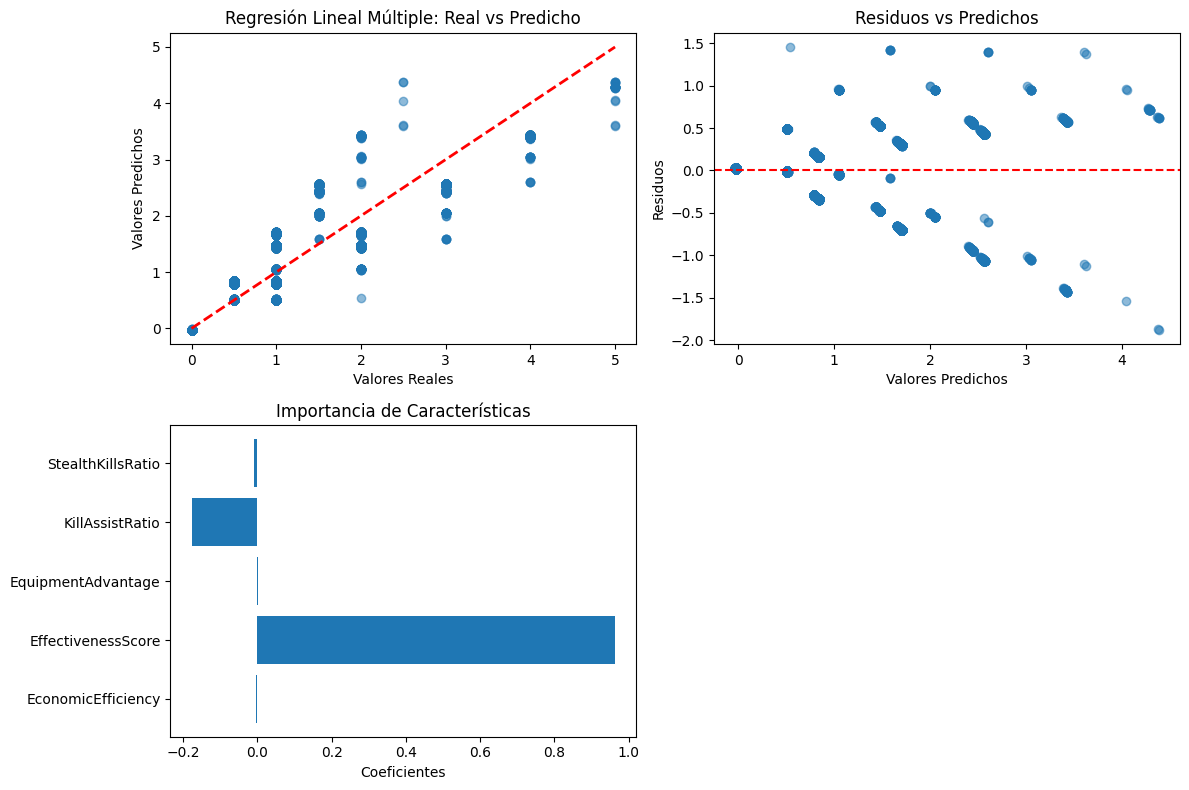

In [6]:
plt.figure(figsize=(12, 8))

# Gráfico de valores reales vs predichos
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_multiple, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal Múltiple: Real vs Predicho')

# Gráfico de residuos
plt.subplot(2, 2, 2)
residuos = y_test - y_pred_multiple
plt.scatter(y_pred_multiple, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Predichos')

# Importancia de características (coeficientes)
plt.subplot(2, 2, 3)
plt.barh(features, coefs_multiple)
plt.xlabel('Coeficientes')
plt.title('Importancia de Características')

plt.tight_layout()
plt.show()